### ICA1 for Practical Systems Biology
from: B-number: B218088;

Collaborator: B-number: B227114

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Question 1.1:**
We would like to estimate the probability of each nucleotide in each DNA sequence.

Write some code that uses a for loop to systematically go through a sequence, extracts a segment (a slice in Python jargon) of the sequence (here the segment is just one letter, but we will consider longer segments later), and then checks if, say, "A" is in the segment. By recording the number of successful checks, you can count the total number of "A" nucleotides and so estimate the probability of a nucleotide in the sequence being an "A" nucleotide.

Check your result using the count method available for all strings.

Repeat this estimation of the probability for the other nucleotides and for both DNA sequences. Print the results. **[5]**

In [3]:
#Question 1.1
dna1 = str(np.load('dna1.npy'))
#len(dna1)
countA, countT, countC, countG, countN = 0,0,0,0,0
for i in dna1:
    if i == "A":
        countA += 1
    elif i == "T":
        countT += 1
    elif i == "C":
        countC += 1
    elif i == "G":
        countG += 1
    else:
        countN += 1
print(f"the number of \"A\" nucleotides is {countA}, the probability of being \"A\" is {countA/len(dna1)}")
print(f"the number of \"T\" nucleotides is {countT}, the probability of being \"T\" is {countT/len(dna1)}")
print(f"the number of \"C\" nucleotides is {countC}, the probability of being \"C\" is {countC/len(dna1)}")
print(f"the number of \"G\" nucleotides is {countG}, the probability of being \"G\" is {countG/len(dna1)}")
print(f"the number of other nucleotides is {countN}, the probability of being other nucleotides is {countN/len(dna1)}")


print("\nthe results below is a check using count method: ")
print(f"the number of \"A\" nucleotides is {dna1.count('A')}, the probability of being \"A\" is {dna1.count('A')/len(dna1)}")
print(f"the number of \"T\" nucleotides is {dna1.count('T')}, the probability of being \"T\" is {dna1.count('T')/len(dna1)}")
print(f"the number of \"C\" nucleotides is {dna1.count('C')}, the probability of being \"C\" is {dna1.count('C')/len(dna1)}")
print(f"the number of \"G\" nucleotides is {dna1.count('G')}, the probability of being \"G\" is {dna1.count('G')/len(dna1)}")


the number of "A" nucleotides is 2465, the probability of being "A" is 0.308125
the number of "T" nucleotides is 2394, the probability of being "T" is 0.29925
the number of "C" nucleotides is 1789, the probability of being "C" is 0.223625
the number of "G" nucleotides is 1352, the probability of being "G" is 0.169
the number of other nucleotides is 0, the probability of being other nucleotides is 0.0

the results below is a check using count method: 
the number of "A" nucleotides is 2465, the probability of being "A" is 0.308125
the number of "T" nucleotides is 2394, the probability of being "T" is 0.29925
the number of "C" nucleotides is 1789, the probability of being "C" is 0.223625
the number of "G" nucleotides is 1352, the probability of being "G" is 0.169


**Question 1.2**: One of the sequences is from the yeast genome and one is ***synthetic and generated assuming each letter in the sequence is independent of the previous letters***. Adapt your code to extract segments of four letters and calculate the probability of finding "TTTT" in each sequence. Note that "TTTTT" has two counts of "TTTT". Refreshing the meaning of independence in probability theory and, considering the probability of occurrence of "TTTT", which sequence is real and which synthetic? Explain your reasoning. **[6]**

In [4]:
dna1 = str(np.load('dna1.npy'))
dna2 = str(np.load('dna2.npy'))
# print(len(dna1), len(dna2))
count1, count2 = 0,0
#count5 = 0
for i in np.arange(0, len(dna1)-4):
    if dna1[i:i+4] == "TTTT":
        count1 += 1
    #if dna1[i:i+8] =="TTTTTTTT":
    #    count5+=1

for j in np.arange(0, len(dna2)-4):
    if dna2[j:j+4] == "TTTT":
        count2 += 1   

print(f"the probability of finding 'TTTT' in sequence1 is {count1/len(dna1)}, \
while the probability of finding 'TTTT' in sequence2 is {count2/len(dna2)}")


the probability of finding 'TTTT' in sequence1 is 0.009875, while the probability of finding 'TTTT' in sequence2 is 0.02775


As is published previously, the GC content of yeast genome is calculated to be 36%, which means that the content of "T" nucleotides in yeast genome is (1-36%)/2 = 32%. so the probability of finding "TTTT" in yeast genome is 32% ^ 4 = 0.01048576, which is similar to the probability of finding 'TTTT' in sequence1. So the 

### Entropy
The entropy of a random variable is a measure of the uncertainty of the random variable. The entropy tells us, in some sense, the "width" of the probability distribution of the random variable. For a random variable, $X$, with probability distribution $P(X)$, the entropy is defined as


$H(x) = -\displaystyle \sum^{}_{x}{P(X = x)\log_2 (P(X = x))}$


where the logarithm is to the base 2 and the entropy is then said to be measured in bits. The sum is over all values of X. For example, if X can take four different possibilities, such as "A", "C", "G", and "T", then x runs from "A" to "T", and there are 4 terms in the sum: $P(X=A), P(X=C), P(X=G), \ and \ P(X=T)$. The entropy does not depend on the actual values taken by X but only on their probabilities.

The log2 of 0 will cause errors in Python, but `xlog2(x)→0` as `x→0`. In your code, check for zeros in the probability distribution and do not include these elements in calculations of entropies.

**Question 2.1**: Write a script or a function in Python to calculate the entropy of a random variable given its probability distribution [2].


the first 2 functions are written by B218088 and B227114 separately, and the third one is a ready-made function written in scipy module, which can be seen as a verification of our functions. And it turns out that the results are all the same. 

In [5]:
def Entropy(px):
    Hpx = 0
    for i in np.arange(0, len(px)):
        if px[i] == 0:
            continue
        Hpx += px[i] * np.log2(px[i])
    if Hpx == 0:
        return Hpx
    else:
        return -Hpx

In [6]:
def entropy_calculation(prob):
    ''' the function used to calculate the entropy of a given prob. distribution
    prob: the distribution
    '''  
    prob = np.asarray(prob) * 1.0 / np.sum(prob, axis=0, keepdims=True)
    entrop = sum(prob * np.log2(prob, out=np.zeros_like(prob), where=(prob!=0)))
    if entrop == 0:
        return entrop
    else:
        return -entrop

In [7]:
import scipy as sci
px = np.load("annualprobs.npy")
entropy = sci.stats.entropy(px[0], base = 2)
print(entropy)
print(entropy_calculation(px[0]))
print(Entropy(px[0]))

3.519349346475517
3.5193493464755177
3.5193493464755177


**Question 2.2**: In the file annualprobs.npy, six probability distributions are defined as an array of arrays. Load these distributions using

  `d= np.load('annualprobs.npy')`

and type

  `d.shape`

to see how the data is structured.

Each distribution represents the probability of an event occurring for each month of the year (and so has 12 numbers). The first element of the array, d[0], gives the first probability distribution of the event occurring, the second element of the array, d[1] gives the second probability distribution of the event, and so on.

Use plt.bar to plot these distributions, label the x-axis with the first letters of the months of the year, and title each figure with the number of the distribution and its entropy in bits. [2]

From what you have learned from your results, which type of probability distributions would you expect to have the highest entropy and which distributions to have the lowest entropy and why? [5]

In [8]:
d = np.load('annualprobs.npy')
print(d)

[[0.06010111 0.04130492 0.08731046 0.0765835  0.09525157 0.0562892
  0.08488968 0.08995465 0.07090427 0.14661349 0.09062795 0.10016919]
 [0.08705501 0.08180415 0.08610777 0.08791366 0.07949633 0.08401198
  0.07743163 0.08358469 0.07703957 0.07768619 0.08817854 0.08969049]
 [0.         0.         0.         0.         0.         0.6168885
  0.3831115  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.31543519 0.31649161
  0.23879741 0.12927579 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.08473688 0.13819307 0.16125715 0.08431425
  0.2320818  0.08162663 0.21779022 0.         0.         0.        ]]


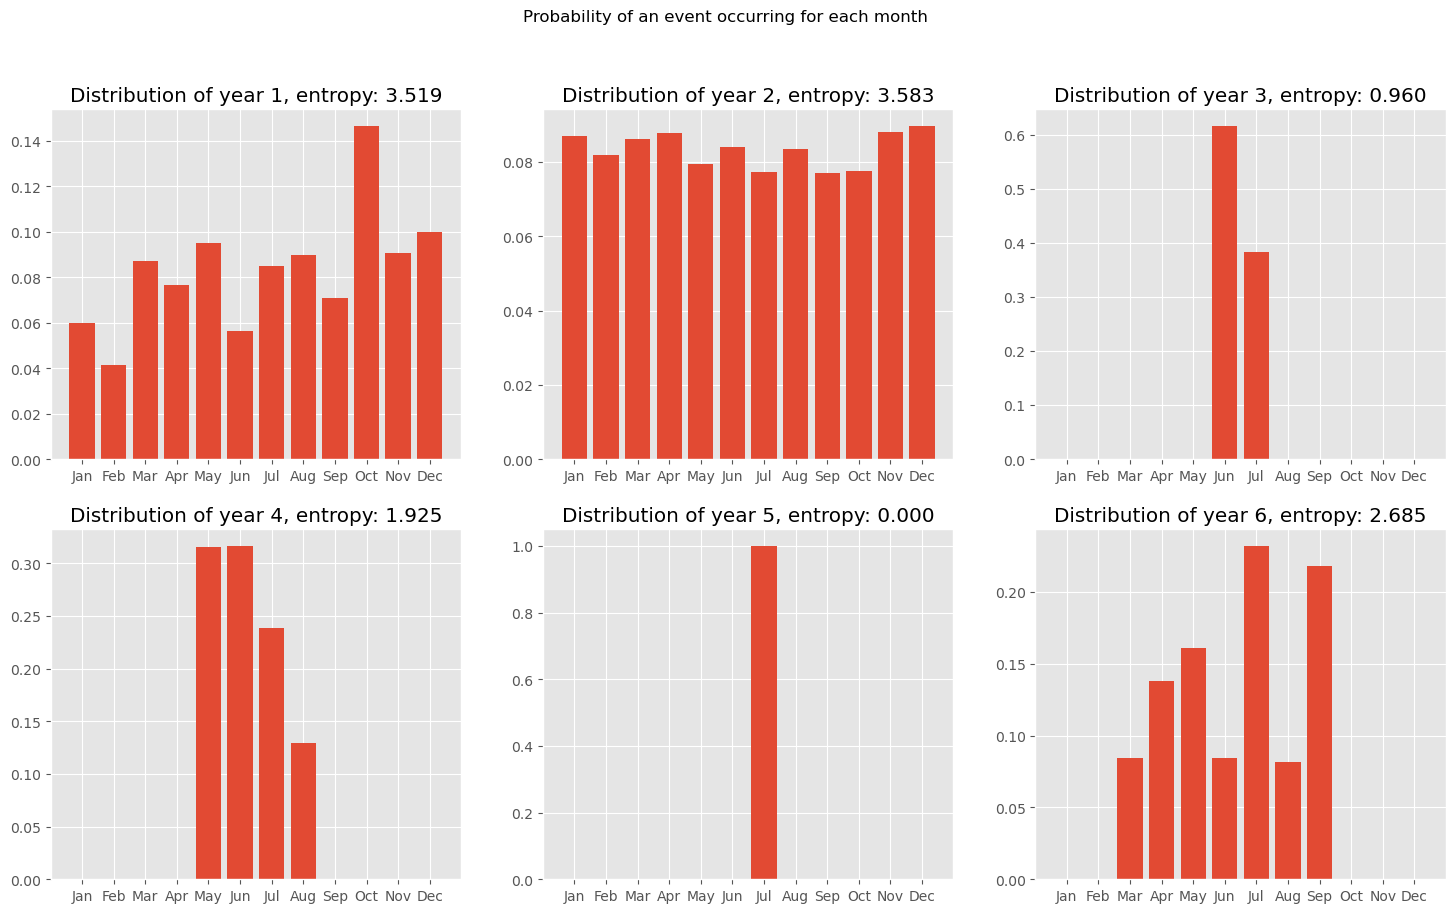

In [9]:
plt.style.use("ggplot")
months = ['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize = (18, 10))

for i in np.arange(d.shape[0]) + 1:
    plt.subplot(2, 3, i)
    plt.bar(months , d[i-1])
    entropy = entropy_calculation(d[i-1])
    plt.title(f"Distribution of year {i}, entropy: {entropy:.3f}")
            
plt.suptitle("Probability of an event occurring for each month")
plt.show()

From the results, the the distribution of year2 has the highest entropy(3.583) while the distribution of year4 has the lowest entropy(0.000). By the definition of entropy calculations, the entropy of a distribution is the minus sum of probability of each status of x times the log2 of this probability. So the entropy of the distribution of year5 will definitely be 0 since there is only 1 status of x and the probability of this status is 1. Considering the log2 of 1 is 0, the entropy of this kind of distribution will be 0. On the contrary, to make the entropy of a distribution be high, the probability of each case in this distribution should be the same, as the absolute value of each item of the summation will be highest. As the distribution of year2 is the closest to this situation, it has the highest entropy among these 6 years. 

##### Question 3.1: 
Write a general function to calculate the correlation coefficient between two arrays $X$ and $Y$. Remember that the correlation coefficient is defined as


$[\displaystyle \sum^{}_{i}{(x_i - E[x])(y_i - E[y])}]\ / \ [\displaystyle \sum^{}_{i}{(x_i -E[x])^2}\displaystyle \sum^{}_{i}{(y_i -E[y])^2}]^\frac{1}{2}$


where $E[x]$ is the mean of $X$ and $E[y]$ is the mean of $Y$. Here xi is the i’th element of the array $X$ and i runs from 0 to the total number of elements in $X$. The sum therefore runs over each element in $X$ and the corresponding element in $Y$. [2]

In [10]:
d= np.load('XandY.npy')
d.shape

(8, 10000)

In [11]:
def Coef(x, y): # x & y are arrays which both have a list of values
    meanx = np.mean(x)
    meany = np.mean(y)
    numer, deno1, deno2 = 0, 0, 0
    for i in np.arange(len(x)):
        numer += (x[i] - meanx) * (y[i] - meany)
        deno1 += (x[i] - meanx) ** 2
        deno2 += (y[i] - meany) ** 2
    coef = numer / (deno1 * deno2) ** 0.5
    return coef


##### Question 3.2: 
Using `np.histogram2d` and `plt.imshow`, plot a two dimensional histogram of one of the datasets with a 10x10 grid to bin the data. You should use `np.rot90` to rotate the output of `np.histogram2d` to appropriately display the data (compare with a scatter plot). Setting `aspect='auto'` in `plt.imshow` creates a square-shaped plot. [3]

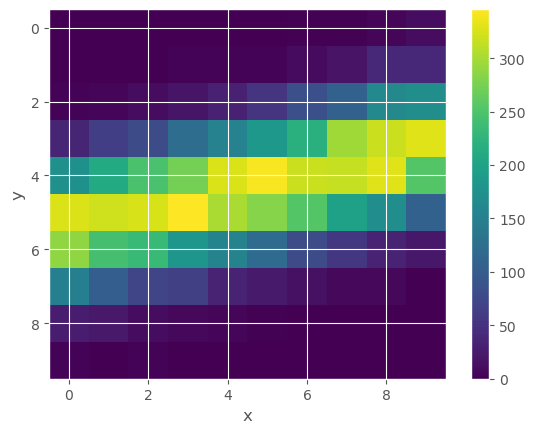

In [12]:
plt.figure()


H, xedges, yedges = np.histogram2d(d[0], d[1])
H = np.rot90(H)
plt.imshow(H, aspect = 'auto')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

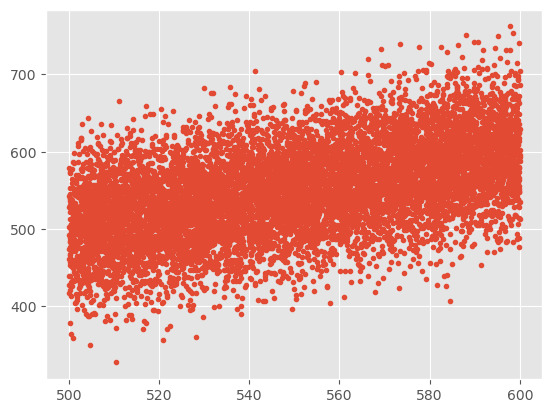

In [13]:
plt.figure()
plt.plot(d[0], d[1], '.')
plt.show()

##### Question 3.3: 
Write a function to calculate the mutual information between two random variables $X$ and $Y$ normalized by the entropy of $Y$. You will need to calculate $H(X)$, $H(Y)$ and $H(Y|X)$. To do so you will need to estimate $P(X,Y)$, and then find $P(X)$ and $P(Y)$.

The conditional entropy can be shown to be

$ H(Y | X) = \displaystyle \sum^{}_{x,\ y}{P(X\ =x, Y\ =y)\log_2 [\frac {P(X\ = x)}{P(X\ = x, Y\ = y)}]}$

where the sum $x$ is over all values of $X$ and the sum $y$ is over all values of $Y$.

We must therefore estimate $P(X=x,Y=y)$ if we wish to calculate the mutual information and will use `np.histogram2d` to do so. The `np.histogram2d` function bins data into a grid of bins. The height of the histogram at a particular grid point gives the number of counts in that bin and is approximately proportional to the probability that X and Y have the values associated with that bin. If a new data point was measured, **then it is more likely to have the X and Y values of bins with high numbers of counts rather than the X and Y values of bins with low numbers of counts**. By normalizing the histogram appropriately so that each bin represents the proportion of events that occurred in that bin, we can interprete the normalized value of a particular point on the grid as the probability that X and Y will have values that are in the bin associated with that point when we make a new measurement.

Use part of the output of `np.histogram2d` to estimate $P(X=x_i,Y=y_j)$, which here is the probability that X lies in the i'th bin on the x-axis and Y lies in the j'th bin on the y-axis.

Given your estimate of $P(X=x_i,Y=y_j)$, you can find P(X) (and P(Y) similarly). By definition

$ P(X\ = x_i) = \displaystyle \sum^{}_{j}{P(X\ = x_i, y\ = y_j)}$


i.e. the probability of X lying in the i'th bin is equal to the probability that X lies in the i'th bin and Y lies in the zeroth bin plus the probability that X lies in the i'th bin and Y lies in the first bin plus the probability that X lies in the i'th bin and Y lies in the second bin, etc. Note, however that

  `nxy, xedges, yedges= np.histogram2d(x, y, (n,m))`

divides the x-axis into n bins and the y-axis into m bins, but that nxy is returned as a `nxm` matrix so that the x changes down the columns and y changes across the rows. **The second argument of np.sum allows addition over either the columns or rows of a matrix.**

Finally, remember to **check that you are not including any zero probabilities when calculating entropies.**

For the first data set show that the correlation coefficient is approximately 0.52 and that the normalized mutual information is approximately 0.09. [10]


In [14]:
def multual_info(x, y):
    nxy, xedges, yedges = np.histogram2d(x = x, y = y)
    nxy = np.rot90(nxy)/10000
    
    con_entropy = 0
    for i in np.arange(nxy.shape[0]):
        for j in np.arange(nxy.shape[1]):
            if nxy[i, j] == 0:
                continue
            con_entropy += nxy[i,j] * np.log2(np.sum(nxy, axis = 0)[j]/nxy[i,j]) 
    
    py = np.sum(nxy, axis = 1)
    Hy = -sum(py * np.log2(py, out = np.zeros_like(py),  where = (py!=0)))
    return (Hy-con_entropy)/Hy

In [15]:
multual_info(d[0], d[1])

0.0853241484964713

**Question 3.4:** Plot each dataset as a scatterplot and title the figure with both the value of the correlation coefficient and the value of the normalized mutual information. Considering all datasets, explain why both measures of dependence change with each dataset in the way you observe. [7]

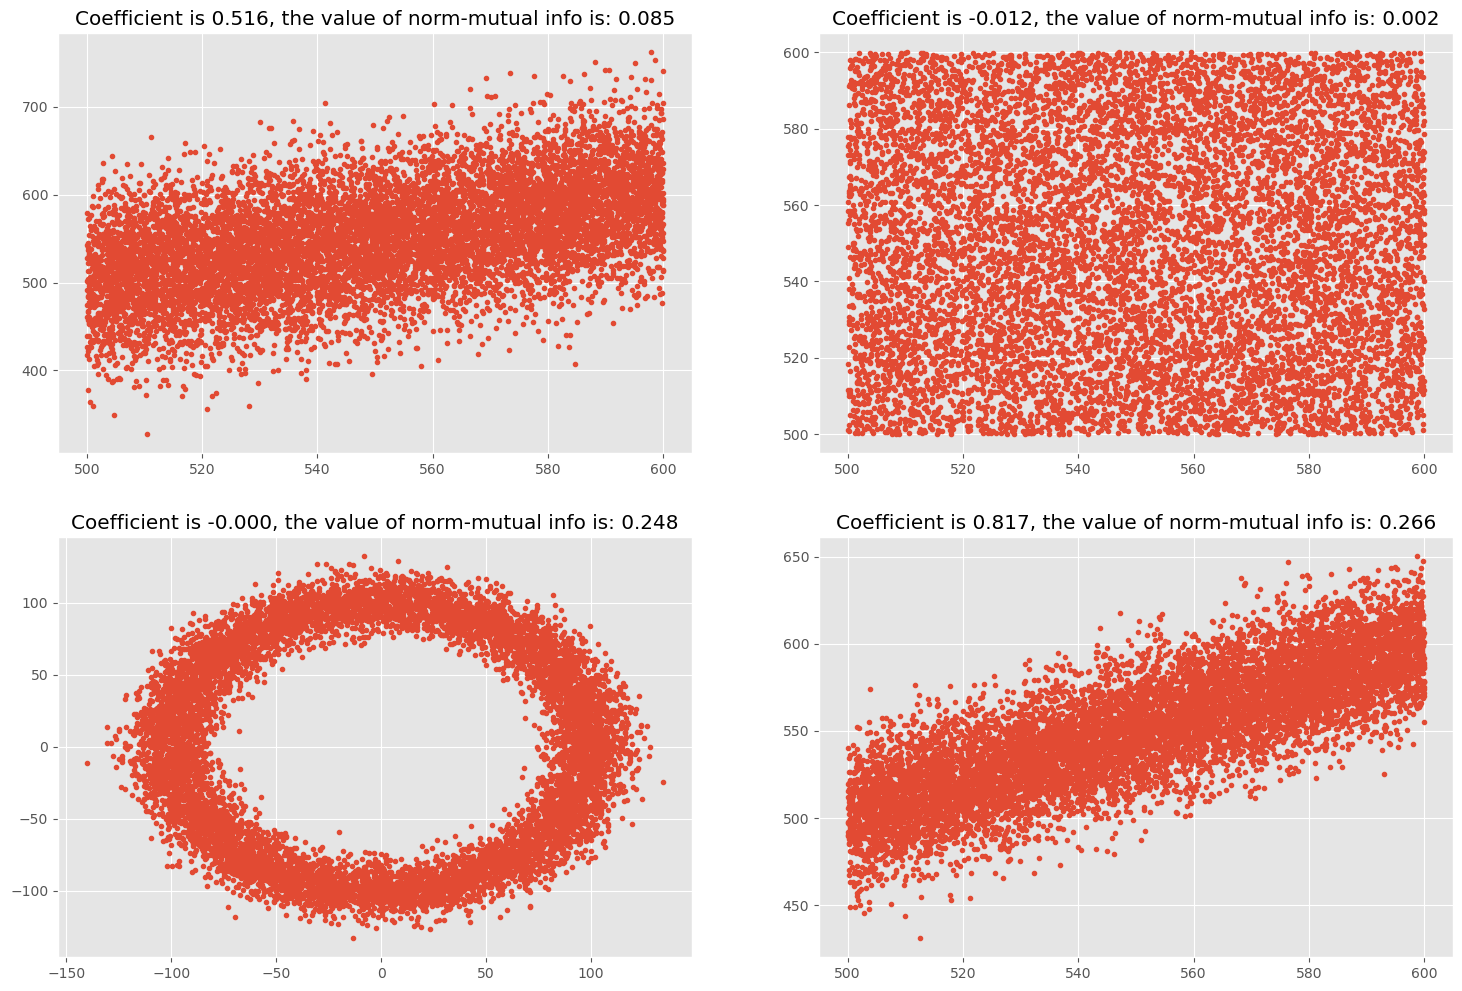

In [16]:
plt.figure(figsize = (18,12))

for i in np.arange(1, int((d.shape[0]/2)+1)):
    plt.subplot(2, 2, i)
    plt.plot(d[(i-1)*2], d[2*i-1], '.')
    coefficient = Coef(d[(i-1)*2], d[2*i-1])
    multual_information = multual_info(d[(i-1)*2], d[2*i-1])
    plt.title(f"Coefficient is {coefficient:.3f}, the value of norm-mutual info is: {multual_information:.3f}")
plt.show()

The correlation coefficient measures the degree of relevance between 2 datasets. As figure1 and 4 has relatively obvious positive correlation trend, their coefficient are much higher than the other 2 sets of datasets, and they are both positive values. As for dataset2 and 3, they have completely random datas and a circular-shaped datas, which means between the x and ys in these datasets, they don't have correlations between each other, so their coeffcient are close to 0. 

For the value of norm-mutual information, it is a measure of the dependence between two random variables. By calculating this value between 2 datasets, we can quantify the "amount of information" about one of the variables can be gained by knowing the value of another variable (https://en.wikipedia.org/wiki/Mutual_information). Based on that, the denser the datapoints are , the higher the normalized mutual information is. So the value of normalized mutual information of dataset2 is the lowest, while the value of dataset3 and 4 are much higher. 
